In [60]:
pip install accelerate -U

In [61]:
pip install transformers

In [62]:
pip install datasets

In [63]:
from datasets import list_datasets

all_datasets = list_datasets()

print(f'현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.')
print(f"처음 10개 데이터셋: {all_datasets[:10]}")

현재 허브에는 70113개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [64]:
from datasets import load_dataset

emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [65]:
train_ds = emotions['train']
train_ds, len(train_ds)

(Dataset({
     features: ['text', 'label'],
     num_rows: 16000
 }),
 16000)

In [66]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [67]:
train_ds.features, train_ds.column_names

({'text': Value(dtype='string', id=None),
  'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)},
 ['text', 'label'])

In [68]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [69]:
### 로컬 또는 서버데이터셋을 위와 같은 데이터셋으로 바꾸기 : 아파치 애로우 포맷

dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}

--2023-10-16 02:33:50--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2023-10-16 02:33:51--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2023-10-16 02:33:51 ERROR 404: Not Found.



In [70]:
!head -n 1 train.txt

head: cannot open 'train.txt' for reading: No such file or directory


In [71]:
import pandas as pd

emotions.set_format(type = 'pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [72]:
df.label.unique()

array([0, 3, 2, 5, 4, 1])

In [73]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


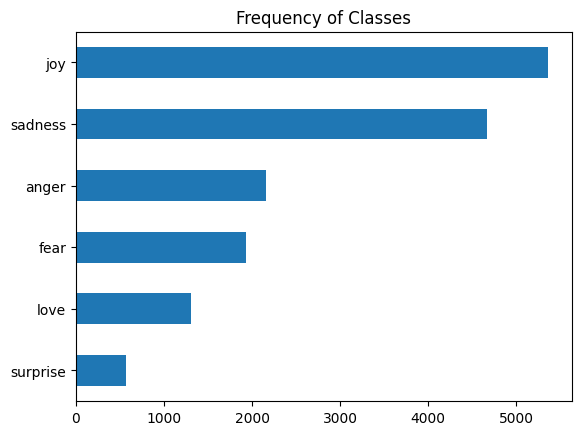

In [74]:
#클래스 분포 살펴보기

import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending = True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

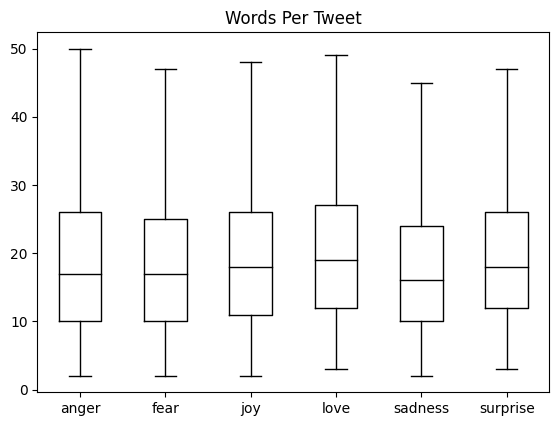

In [75]:
# 데이터의 불균형 확인 --> 샘플링 기법ㅂ??? imbalanced-learn 라이브러리 참고

df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by = 'label_name', grid = False,\
           showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [76]:
emotions.reset_format()

In [77]:
#문자 토큰화

text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [78]:
# 각 문자를 정수로 치환
token2idx = {ch:idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [79]:
inputs_ids = [token2idx[token] for token in tokenized_text] #원텍스트를 숫자로 치환한 문장
inputs_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [80]:
categorical_df = pd.DataFrame(
    {"Name":["Bumblebee", "Optimus Prime", 'Megatron'], "Label ID":[0, 1, 2]}
)
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [81]:
import torch
import torch.nn.functional as F

inputs_ids = torch.tensor(inputs_ids)
one_hot_encodings = F.one_hot(inputs_ids, num_classes=len(token2idx))
print(one_hot_encodings.shape) #총 19개의 단어 중복 포함 이기에 37 x 19
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {inputs_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

torch.Size([38, 20])
토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [82]:
#단어 토큰화

tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

In [83]:
#이런식으로 하다간 입력 토큰이 10억개가 되고 이걸 신경망 첫번째 층에서 1000차원으로 압축한다해도 10억개의 가중치를 가지게 된다

In [84]:
# 부분단어 토큰화
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [85]:
len(text), len(encoded_text['input_ids'])

(38, 13)

In [86]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [87]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [88]:
tokenizer.vocab_size

30522

In [89]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [90]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size = None)

In [91]:
emotions_encoded.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

In [92]:
tokenizer.all_special_tokens, tokenizer.all_special_ids

(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'], [100, 102, 0, 101, 103])

In [93]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [94]:
emotions['train'][1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [95]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [96]:
text = 'this is a text'
inputs = tokenizer(text, return_tensors='pt')
inputs_list = tokenizer(text)
print(inputs_list, inputs)
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

{'input_ids': [101, 2023, 2003, 1037, 3793, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]} {'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
입력 텐서 크기: torch.Size([1, 6])


In [97]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [98]:
inputs_list

{'input_ids': [101, 2023, 2003, 1037, 3793, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [99]:
tokenizer.convert_ids_to_tokens(inputs_list['input_ids'])

['[CLS]', 'this', 'is', 'a', 'text', '[SEP]']

In [100]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad(): ##순전파만 할 경우 역전파 x -> 파라미터 업데이트 하지 않음 inference할 경우 사용
  outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.2535, -0.1091,  0.0759,  ..., -0.1054,  0.2257,  0.4615],
         [-0.7154, -0.2742, -0.0954,  ..., -0.3597,  0.5174,  0.3450],
         [-0.4100, -0.2195,  0.1850,  ..., -0.0136,  0.1607,  1.0422],
         [-0.2523, -0.0254,  0.2472,  ..., -0.1637,  0.0865,  1.0516],
         [-0.0570, -0.1057,  0.0662,  ...,  0.0584,  0.1034,  0.2971],
         [ 0.9184,  0.1577, -0.4105,  ...,  0.1509, -0.7327, -0.1572]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [101]:
outputs.last_hidden_state.size() # [batch_size, n_tokens, hidden_dims] 각 토큰마다 768차원으로 변환

torch.Size([1, 6, 768])

In [102]:
outputs.last_hidden_state[:,0].size() # CLS 토큰에 매칭된 벡터를 입력 특성으로 사용한다

torch.Size([1, 768])

In [103]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items()\
            if k in tokenizer.model_input_names}
  #마지막 은닉 상태 추출
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  #CLS 토큰에 대한 벡터 반환
  return {"hidden_state":last_hidden_state[:, 0].cpu().numpy()}

emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [104]:
emotions_encoded.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

In [105]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
 'validation': ['text',
  'label',
  'input_ids',
  'attention_mask',
  'hidden_state'],
 'test': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']}

In [106]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [107]:
pip install umap-learn

In [108]:
#hidden_state가 감정표현에 대한 정보를 제대로 가지고 있나 확인
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#0,1로 범위 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
#UMAP 객채생성 후 훈련
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
#2D 임베딩의 데이터프레임 생성
df_emb = pd.DataFrame(mapper.embedding_, columns = ['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.028085,6.180578,0
1,-3.308932,5.251228,0
2,5.264216,2.711999,3
3,-2.475760,3.160240,2
4,-3.402790,3.353114,3


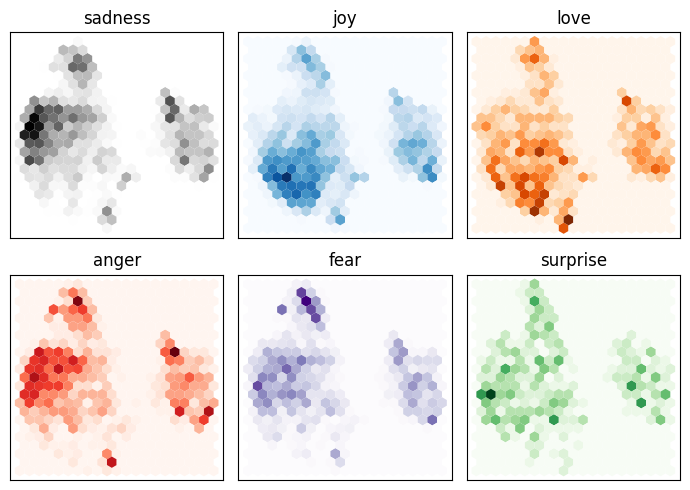

In [109]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", 'Oranges', 'Reds' ,'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, \
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [110]:
from sklearn.linear_model import LogisticRegression

#수렴을 보장하기위해 max_iter를 증가
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [111]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

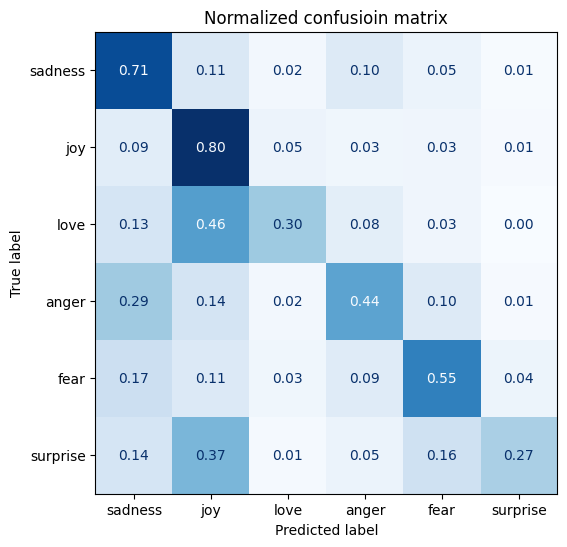

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusioin matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [113]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification\
         .from_pretrained(model_ckpt, num_labels=num_labels)\
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [114]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [136]:
from huggingface_hub import notebook_login

notebook_login()

In [116]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded['train'])
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,\
                                  num_train_epochs=2,\
                                  learning_rate=2e-5,\
                                  per_device_train_batch_size=batch_size,\
                                  per_device_eval_batch_size=batch_size,\
                                  weight_decay=0.01,\
                                  evaluation_strategy='epoch',\
                                  disable_tqdm=False,\
                                  logging_steps=logging_steps,\
                                  push_to_hub=True,\
                                  save_strategy="epoch",\
                                  load_best_model_at_end=True,\
                                  log_level="error")

In [117]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,\
                  compute_metrics=compute_metrics,\
                  train_dataset=emotions_encoded['train'],\
                  eval_dataset=emotions_encoded['validation'],\
                  tokenizer=tokenizer)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.314333,0.907000,0.906046
2,No log,0.219087,0.926500,0.926415


TrainOutput(global_step=500, training_loss=0.5406254272460937, metrics={'train_runtime': 250.8806, 'train_samples_per_second': 127.551, 'train_steps_per_second': 1.993, 'total_flos': 720342861696000.0, 'train_loss': 0.5406254272460937, 'epoch': 2.0})

In [118]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.21908724308013916,
 'test_accuracy': 0.9265,
 'test_f1': 0.9264148990589147,
 'test_runtime': 4.381,
 'test_samples_per_second': 456.513,
 'test_steps_per_second': 7.304}

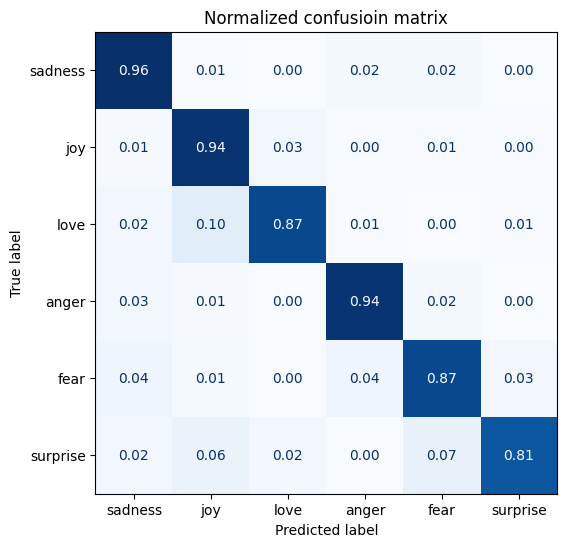

In [120]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)



In [124]:
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=['label'], shuffle=True,\
    batch_size=batch_size)
tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(
    columns=tokenizer_columns, label_cols=['label'], shuffle=False,\
    batch_size=batch_size
)

In [125]:
import tensorflow as tf

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy()
)

tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2
250/250 [==============================] - 232s 701ms/step - loss: 0.5212 - sparse_categorical_accuracy: 0.8209 - val_loss: 0.1705 - val_sparse_categorical_accuracy: 0.9320
Epoch 2/2
250/250 [==============================] - 138s 552ms/step - loss: 0.1408 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.1437 - val_sparse_categorical_accuracy: 0.9345


In [133]:
tf_model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.1437349>,
 'sparse_categorical_accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9345>}

In [135]:
#find error

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  #모든 입력 텐서를 모델과 같은 장치로 이동
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch['label'].to(device),\
                         reduction="none")
  # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮깁니다.
  return {'loss':loss.cpu().numpy(),
          'predicted_label':pred_label.cpu().numpy()}

#데이터셋을 다시 파이토치 텐서로 변환합니다.
emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask','label'])

emotions_encoded['validation'] = emotions_encoded['validation'].map(
    forward_pass_with_label, batched=True, batch_size=16
)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [137]:
emotions_encoded.set_format("pandas")
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = (df_test['predicted_label'].apply(label_int2str))

In [139]:
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.022426
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.027873
2,i feel like a faithful servant,love,love,0.399131
3,i am just feeling cranky and blue,anger,anger,0.040306
4,i can have for a treat or if i am feeling festive,joy,joy,0.016156


In [141]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.392635
882,i feel badly about reneging on my commitment t...,love,sadness,5.338023
177,im sure much of the advantage is psychological...,sadness,joy,5.275287
1801,i feel that he was being overshadowed by the s...,love,sadness,5.247747
1963,i called myself pro life and voted for perry w...,joy,sadness,5.212451
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.176463
1274,i am going to several holiday parties and i ca...,joy,sadness,4.945730
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.858040
1509,i guess this is a memoir so it feels like that...,joy,fear,4.761118
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.741693


In [143]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
578,i got to christmas feeling positive about the ...,joy,joy,0.013893
1513,i have also been getting back into my gym rout...,joy,joy,0.014009
452,i manage to complete the lap not too far behin...,joy,joy,0.014248
1636,i feel so lucky that my mom is alive and i get...,joy,joy,0.014275
1873,i feel practically virtuous this month i have ...,joy,joy,0.014320
19,i had lunch with an old friend and it was nice...,joy,joy,0.014377
1780,ive explained that he is very creative and lov...,joy,joy,0.014460
1921,i feel the need to write i always want to writ...,joy,joy,0.014751
941,i expected but it did feel hopeful and it defi...,joy,joy,0.014752
1263,i feel this way about blake lively,joy,joy,0.014782


In [144]:
trainer.push_to_hub(commit_message='finetuned completed')

'https://huggingface.co/allspace/distilbert-base-uncased-finetuned-emotion/tree/main/'

In [146]:
from transformers import pipeline


model_id = "allspace/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [171]:
my_tweet = "I saw a movie today and it was really good."
preds = classifier(my_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


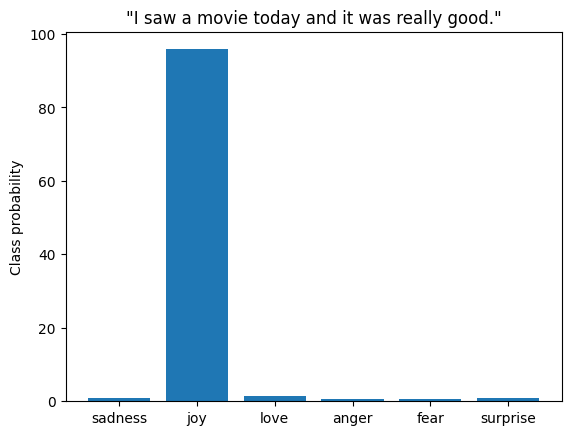

In [172]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df['score'], color="C0")
plt.title(f'"{my_tweet}"')
plt.ylabel("Class probability")
plt.show()

In [156]:
my_tweet = 'Feel like gawnho'